# **Brain Tumor MRI Classification using Deep Learning**

### Problem Statement

The accurate and timely diagnosis of brain tumors is crucial for effective treatment planning and improving patient outcomes. Manual analysis of MRI images for tumor classification is a time-consuming and subjective process that requires specialized expertise. There is a need for an automated and efficient system that can accurately classify brain tumors from MRI images to assist radiologists and medical professionals.

### Aim

The aim of this project is to develop and evaluate a convolutional neural network (CNN)-based image classification system for the automated classification of brain tumors from MRI images into different types (e.g., Glioma, Meningioma, Pituitary, No Tumor).

### Purpose

The purpose of this project is to leverage deep learning techniques to create a reliable and accessible tool for brain tumor classification. This tool can serve as a valuable aid in clinical settings by providing quick and objective preliminary diagnoses, potentially reducing diagnosis time and improving the consistency of classifications. The project also aims to explore the effectiveness of different CNN architectures and fine-tuning approaches for this specific medical imaging task.

### Dataset Description

The dataset used here is sourced from Roboflow, containing **2,443 labeled MRI images**, split into training, validation, and test sets. The images are organized into directories corresponding to different tumor types: **Glioma**, **Meningioma**, **Pituitary**, and **No Tumor**. The dataset is split into training, validation, and test sets.

- **Training Data:** This set contains **1,695 training images**, used to train the CNN models.
- **Validation Data:** This set has **502 validation images** used to evaluate the model's performance during training and tune hyperparameters.
- **Test Data:** An independent set of **246 test images** used for final evaluation of the trained models.

The images have been preprocessed using techniques like resizing and augmentation (for the training set) to prepare them for input into the CNN models.We resized all images to **224x224 pixels**, normalized pixel values, and used data augmentation to improve model robustness.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Set image size and batch size
IMG_SIZE = (224,224)
BACTH_SIZE = 32

In [ ]:
# Image Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
# Rescale for validation and test data
val_test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# define directories
train_dir = 'Tumour-20250713T160908Z-1-001/Tumour/train/'
val_dir = 'Tumour-20250713T160908Z-1-001/Tumour/valid/'
test_dir = 'Tumour-20250713T160908Z-1-001/Tumour/test/'


In [ ]:
# Load images from folders

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BACTH_SIZE,
    class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BACTH_SIZE,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BACTH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [ ]:
# get the class index-to-name mapping
class_names = list(train_data.class_indices.keys())

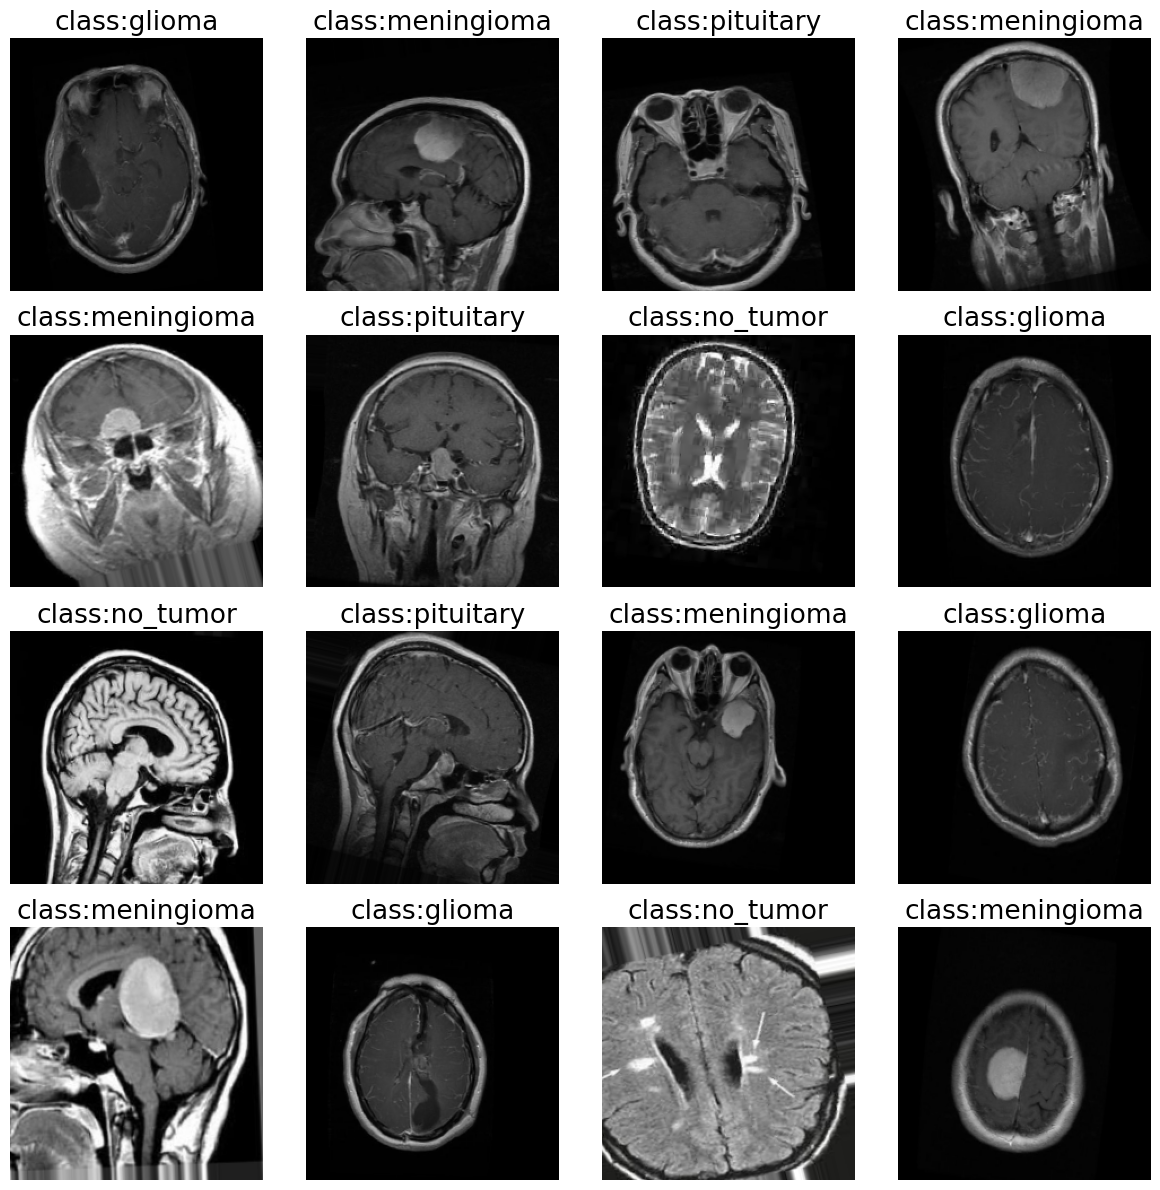

In [ ]:
# visualize a batch from training data.
x,y = train_data.next()
y_labels = tf.argmax(y,axis = 1)

plt.figure(figsize = (12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i])
    plt.title(f"class:{class_names[y_labels[i]]}", fontsize = 19)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# import layers and models
from tensorflow.keras import layers, models

In [ ]:
# build CNN
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')

])

In [ ]:
# compile the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# generate model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
# train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data = val_data
)

Epoch 1/10
53/53 [==============================] - 70s 1s/step - loss: 1.1676 - accuracy: 0.5156 - val_loss: 0.9350 - val_accuracy: 0.6295
Epoch 2/10
53/53 [==============================] - 59s 1s/step - loss: 0.9005 - accuracy: 0.6460 - val_loss: 0.8618 - val_accuracy: 0.6614
Epoch 3/10
53/53 [==============================] - 63s 1s/step - loss: 0.7567 - accuracy: 0.7227 - val_loss: 0.6917 - val_accuracy: 0.7251
Epoch 4/10
53/53 [==============================] - 64s 1s/step - loss: 0.7281 - accuracy: 0.7127 - val_loss: 0.6722 - val_accuracy: 0.7131
Epoch 5/10
53/53 [==============================] - 67s 1s/step - loss: 0.6811 - accuracy: 0.7475 - val_loss: 0.7991 - val_accuracy: 0.6972
Epoch 6/10
53/53 [==============================] - 59s 1s/step - loss: 0.6235 - accuracy: 0.7628 - val_loss: 0.4969 - val_accuracy: 0.8108
Epoch 7/10
53/53 [==============================] - 67s 1s/step - loss: 0.5889 - accuracy: 0.7758 - val_loss: 0.4871 - val_accuracy: 0.8008
Epoch 8/10
53/53 [==

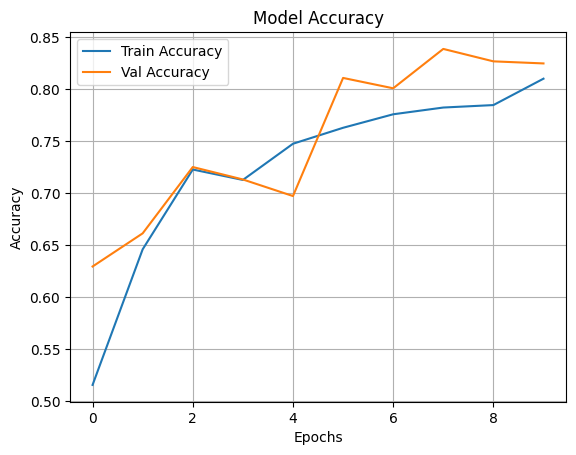

In [ ]:
# plot training progress
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"\n Test Accuracy: {test_acc:.4f}")

8/8 [==============================] - 3s 441ms/step - loss: 0.5334 - accuracy: 0.8374

 Test Accuracy: 0.8374


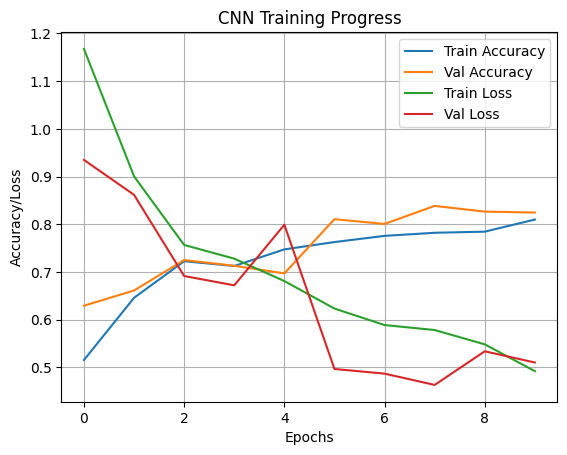

In [ ]:
# Plot learning curve
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')

plt.title("CNN Training Progress")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Class wise Evaluation using precision, recall, confusion matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predict on test data
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)

8/8 [==============================] - 2s 223ms/step


In [ ]:
# ClassWise Evaluation
print(classification_report(y_true, y_pred,target_names=class_names))

              precision    recall  f1-score   support

      glioma       0.89      0.91      0.90        80
  meningioma       0.86      0.57      0.69        63
    no_tumor       0.76      0.92      0.83        49
   pituitary       0.83      0.96      0.89        54

    accuracy                           0.84       246
   macro avg       0.83      0.84      0.83       246
weighted avg       0.84      0.84      0.83       246



In [ ]:
# Save the trained model
model.save("brain_tumor_custom_cnn.h5")
print('CNN Brain-Tumor-Classification Model Saved Successfully!!!')

C:\Users\uttam\brain-tumor-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNN Brain-Tumor-Classification Model Saved Successfully!!!


In [ ]:
# Load the model again and make prediction
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('brain_tumor_custom_cnn.h5')
print("Model Loaded Successfully!!!")

Model Loaded Successfully!!!


In [ ]:
# Predict in new image data.
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define Classes in correct order
class_names = ['Glioma','Meningioma','No_Tumor', 'Pituitory']

In [ ]:
# Load and preprocess the single image
img_path = 'Tumour-20250713T160908Z-1-001/Tumour/train/no_tumor/Tr-no_0013_jpg.rf.ba75dd083e4c092e31fd59db1a7de9dc.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb,(224,224))
img_array = img_resized / 255.0
img_array = np.expand_dims(img_array, axis = 0)

In [ ]:
#prediction
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

1/1 [==============================] - 0s 99ms/step


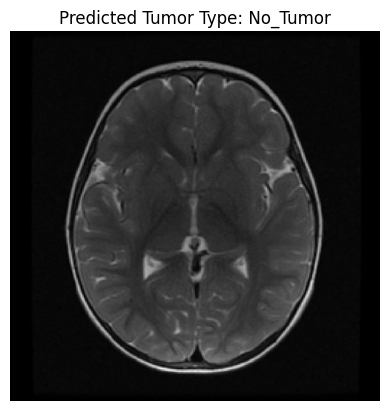

In [ ]:
# Show image and predicted class
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Predicted Tumor Type: {predicted_class}")
plt.show()

In [ ]:
def predict_and_show(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Image not found or cannot be read.")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb,(224,224))
    img_array = img_resized / 255.0
    img_array = np.expand_dims(img_array, axis = 0)

    #prediction
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_label = class_names[predicted_index]
    confidence = prediction[0][predicted_index] * 100

    # Show image and predicted class
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted Tumor Type: {predicted_label}({confidence:.2f}%)", fontsize=12)
    plt.show()

    return predicted_label


1/1 [==============================] - 0s 37ms/step


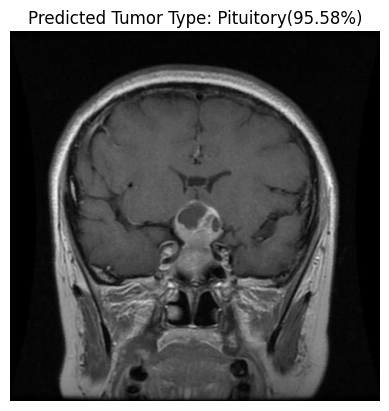

'Pituitory'

In [ ]:
predict_and_show('Tumour-20250713T160908Z-1-001/Tumour/train/pituitary/Tr-pi_0011_jpg.rf.2e3b87a53534caae6264c3bdc13cedc1.jpg')

### Build MobileNetV2 Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Specify the image size
IMG_SIZE = (224,224)
mobilenet_base = MobileNetV2(
    input_shape = IMG_SIZE + (3,),
    include_top=False,
    weights = 'imagenet'
)

# Freeze the base model
mobilenet_base.trainable = False

In [ ]:
# create custom classifier
mobilenet_model = Sequential([
    mobilenet_base,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128,activation = 'relu'),
    Dropout(0.3),
    Dense(4,activation = 'softmax')
])

In [ ]:
# compile the model
mobilenet_model.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Evaluate the model on test data
mobilenet_model.evaluate(test_data)

8/8 [==============================] - 3s 414ms/step - loss: 0.5404 - accuracy: 0.7846


[0.5404050350189209, 0.7845528721809387]

In [ ]:
# save the model
mobilenet_model.save('mobilenetv2_brain_tumor_model_baseline.h5')

C:\Users\uttam\brain-tumor-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Build ResNet50 Model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Load the ResNet50 model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
# Freeze the base model
base_model_resnet.trainable = False

In [ ]:
# Add custom layer over top
from tensorflow.keras import layers, models

In [ ]:
# define custom model
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

resnet_model = Model(inputs = base_model_resnet.input, outputs = predictions)

In [ ]:
# compile the model
resnet_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate= 0.0001),
    metrics = ['accuracy']
)

In [ ]:
# callback for early stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights= True )

In [ ]:
# fit the model
history_resnet = resnet_model.fit(
    train_data,
    epochs = 10,
    validation_data=val_data,
    callbacks = [early_stop]
)

Epoch 1/10
53/53 [==============================] - 101s 2s/step - loss: 1.5750 - accuracy: 0.2708 - val_loss: 1.3440 - val_accuracy: 0.3426
Epoch 2/10
53/53 [==============================] - 99s 2s/step - loss: 1.4075 - accuracy: 0.3204 - val_loss: 1.3091 - val_accuracy: 0.3924
Epoch 3/10
53/53 [==============================] - 107s 2s/step - loss: 1.3415 - accuracy: 0.3599 - val_loss: 1.2522 - val_accuracy: 0.4143
Epoch 4/10
53/53 [==============================] - 108s 2s/step - loss: 1.2913 - accuracy: 0.3965 - val_loss: 1.2213 - val_accuracy: 0.4900
Epoch 5/10
53/53 [==============================] - 104s 2s/step - loss: 1.2614 - accuracy: 0.4260 - val_loss: 1.1947 - val_accuracy: 0.4880
Epoch 6/10
53/53 [==============================] - 98s 2s/step - loss: 1.2326 - accuracy: 0.4531 - val_loss: 1.2045 - val_accuracy: 0.5896
Epoch 7/10
53/53 [==============================] - 98s 2s/step - loss: 1.2138 - accuracy: 0.4950 - val_loss: 1.1538 - val_accuracy: 0.5438
Epoch 8/10
53/53

In [ ]:
# Evaluate the model on test data.
resnet_model.evaluate(test_data)

8/8 [==============================] - 11s 1s/step - loss: 1.1170 - accuracy: 0.5528


[1.11704421043396, 0.5528455376625061]

### EfficientNetB0 model

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Load base model
effnet_base_model = EfficientNetB0(
    weights = 'imagenet',
    include_top=False,
    input_shape= (224,224,3)
)
base_model.trainable = False

In [ ]:
# Add custom layer
EffNetB0_model = models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(4,activation = 'softmax')
])

In [ ]:
# compile the model
EffNetB0_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
# callback for early stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights= True )

In [ ]:
# Train the model
history_effNetB0 = EffNetB0_model.fit(
    train_data,
    validation_data=val_data,
    epochs = 10,
    callbacks = [early_stop]
)

Epoch 1/10
53/53 [==============================] - 59s 1s/step - loss: 1.4026 - accuracy: 0.3009 - val_loss: 1.3795 - val_accuracy: 0.3207
Epoch 2/10
53/53 [==============================] - 54s 1s/step - loss: 1.3932 - accuracy: 0.3021 - val_loss: 1.3767 - val_accuracy: 0.3207
Epoch 3/10
53/53 [==============================] - 56s 1s/step - loss: 1.3893 - accuracy: 0.2956 - val_loss: 1.3728 - val_accuracy: 0.3207
Epoch 4/10
53/53 [==============================] - 56s 1s/step - loss: 1.3918 - accuracy: 0.2914 - val_loss: 1.3733 - val_accuracy: 0.3207
Epoch 5/10
53/53 [==============================] - 56s 1s/step - loss: 1.3775 - accuracy: 0.3204 - val_loss: 1.3738 - val_accuracy: 0.3207
Epoch 6/10
53/53 [==============================] - 57s 1s/step - loss: 1.3751 - accuracy: 0.3156 - val_loss: 1.3717 - val_accuracy: 0.3207
Epoch 7/10
53/53 [==============================] - 58s 1s/step - loss: 1.3748 - accuracy: 0.3263 - val_loss: 1.3720 - val_accuracy: 0.3207
Epoch 8/10
53/53 [==

In [ ]:
# Evaluate the model
EffNetB0_model.evaluate(test_data)

8/8 [==============================] - 6s 744ms/step - loss: 1.3716 - accuracy: 0.3252


[1.3715554475784302, 0.3252032399177551]

In [ ]:
#%pip install monai

In [ ]:
#%pip install torchio

## Fine Tune the Existing Models

#### Fine tune MobileNetV2 Model

In [ ]:
# unfreeze the first few layers of the model
for layers in mobilenet_base.layers[-30:]:
    layers.trainable = True

In [ ]:
# Freeze the rest
for layer in base_model.layers[:-30]:
    layer.trainable = False

In [ ]:
# create custom classifier
fine_tune_mobilenet_model = Sequential([
    mobilenet_base,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128,activation = 'relu'),
    Dropout(0.3),
    Dense(4,activation = 'softmax')
])

In [ ]:
# compile the model
fine_tune_mobilenet_model.compile(
    optimizer = Adam(learning_rate = 1e-5),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
fine_tune_mobilenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                

In [ ]:
# Fit the model
history_mobilenet = fine_tune_mobilenet_model.fit(
    train_data,
    validation_data= val_data,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
53/53 [==============================] - 68s 1s/step - loss: 1.5965 - accuracy: 0.2950 - val_loss: 1.5495 - val_accuracy: 0.2151
Epoch 2/10
53/53 [==============================] - 60s 1s/step - loss: 1.5032 - accuracy: 0.3445 - val_loss: 1.4904 - val_accuracy: 0.2928
Epoch 3/10
53/53 [==============================] - 54s 1s/step - loss: 1.4192 - accuracy: 0.3670 - val_loss: 1.4227 - val_accuracy: 0.3506
Epoch 4/10
53/53 [==============================] - 53s 996ms/step - loss: 1.3080 - accuracy: 0.4307 - val_loss: 1.3414 - val_accuracy: 0.3944
Epoch 5/10
53/53 [==============================] - 53s 1s/step - loss: 1.2699 - accuracy: 0.4513 - val_loss: 1.2759 - val_accuracy: 0.4243
Epoch 6/10
53/53 [==============================] - 61s 1s/step - loss: 1.2050 - accuracy: 0.4838 - val_loss: 1.2171 - val_accuracy: 0.4502
Epoch 7/10
53/53 [==============================] - 57s 1s/step - loss: 1.1389 - accuracy: 0.5150 - val_loss: 1.1527 - val_accuracy: 0.5040
Epoch 8/10
53/53 

In [ ]:
results = fine_tune_mobilenet_model.evaluate(test_data)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")

8/8 [==============================] - 5s 536ms/step - loss: 1.0698 - accuracy: 0.4919
Test Loss: 1.0698
Test Accuracy: 0.4919


### Fine-Tune the ResNet50 model

In [ ]:
# Unfreeze the last few layers of RestNet50
for layer in base_model_resnet.layers[-15:]:
    layer.trainable = True

In [ ]:
# Compile the ResNet50 Model with new settings
resnet_model.compile(
    optimizer = Adam(learning_rate=1e-5),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history_fine_tuned = resnet_model.fit(
    train_data,
    validation_data= val_data,
    epochs = 15,
    callbacks=[EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True)]
)

Epoch 1/15
53/53 [==============================] - 157s 3s/step - loss: 1.1783 - accuracy: 0.5015 - val_loss: 1.4747 - val_accuracy: 0.2649
Epoch 2/15
53/53 [==============================] - 141s 3s/step - loss: 0.9517 - accuracy: 0.6437 - val_loss: 1.4390 - val_accuracy: 0.3307
Epoch 3/15
53/53 [==============================] - 157s 3s/step - loss: 0.8382 - accuracy: 0.6767 - val_loss: 1.3516 - val_accuracy: 0.3645
Epoch 4/15
53/53 [==============================] - 151s 3s/step - loss: 0.8013 - accuracy: 0.7015 - val_loss: 1.1638 - val_accuracy: 0.4243
Epoch 5/15
53/53 [==============================] - 126s 2s/step - loss: 0.7643 - accuracy: 0.7009 - val_loss: 0.8821 - val_accuracy: 0.6892
Epoch 6/15
53/53 [==============================] - 116s 2s/step - loss: 0.7278 - accuracy: 0.7127 - val_loss: 0.6975 - val_accuracy: 0.7510
Epoch 7/15
53/53 [==============================] - 128s 2s/step - loss: 0.6917 - accuracy: 0.7357 - val_loss: 0.6463 - val_accuracy: 0.7510
Epoch 8/15
53

In [ ]:
resnet_results = resnet_model.evaluate(test_data)
print(f"Test Loss: {resnet_results[0]:.4f}")
print(f"Test Accuracy: {resnet_results[1]:.4f}")

8/8 [==============================] - 11s 1s/step - loss: 0.5302 - accuracy: 0.7886
Test Loss: 0.5302
Test Accuracy: 0.7886


### Fine Tune the EfficientNetB0 Model

In [ ]:
# unfreeze the few layers in EffnetB0 Model
for layer in effnet_base_model.layers[-30:]:
    layer.trainable = True

In [ ]:
# Compile the model
EffNetB0_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=1e-2),
    metrics=['accuracy']
)

In [ ]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

In [ ]:
# fit the model
effnet_history_fine_tuned = EffNetB0_model.fit(
    train_data,
    validation_data= val_data,
    epochs = 10,
    callbacks=callbacks
)

Epoch 1/10
53/53 [==============================] - 87s 1s/step - loss: 1.5697 - accuracy: 0.3080 - val_loss: 1.3840 - val_accuracy: 0.3207
Epoch 2/10
53/53 [==============================] - 73s 1s/step - loss: 1.3715 - accuracy: 0.3327 - val_loss: 1.3744 - val_accuracy: 0.3207
Epoch 3/10
53/53 [==============================] - 72s 1s/step - loss: 1.3684 - accuracy: 0.3327 - val_loss: 1.3745 - val_accuracy: 0.3207
Epoch 4/10
53/53 [==============================] - 81s 2s/step - loss: 1.3656 - accuracy: 0.3327 - val_loss: 1.3741 - val_accuracy: 0.3207
Epoch 5/10
53/53 [==============================] - 78s 1s/step - loss: 1.3655 - accuracy: 0.3327 - val_loss: 1.3757 - val_accuracy: 0.3207
Epoch 6/10
53/53 [==============================] - 81s 2s/step - loss: 1.3658 - accuracy: 0.3327 - val_loss: 1.3759 - val_accuracy: 0.3207
Epoch 7/10
53/53 [==============================] - 77s 1s/step - loss: 1.3654 - accuracy: 0.3327 - val_loss: 1.3746 - val_accuracy: 0.3207
Epoch 8/10
53/53 [==

In [ ]:
effnet_results = resnet_model.evaluate(test_data)
print(f"Test Loss: {effnet_results[0]:.4f}")
print(f"Test Accuracy: {effnet_results[1]:.4f}")

8/8 [==============================] - 15s 2s/step - loss: 0.5302 - accuracy: 0.7886
Test Loss: 0.5302
Test Accuracy: 0.7886


In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [3]:
!pip install streamlit pyngrok

In [8]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Load your trained model
model = load_model('brain_tumor_custom_cnn.h5')

# Define the class names as per your training
class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Streamlit app configuration
st.set_page_config(page_title="Brain Tumor Classifier", page_icon="🧠", layout="centered")

st.title("🧠 Brain Tumor MRI Image Classifier")
st.markdown("Upload an MRI image to classify the tumor type (Glioma, Meningioma, Pituitary, or No Tumor).")

# File uploader for MRI image
uploaded_file = st.file_uploader("Choose an MRI Image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Load and preprocess image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded MRI Image", use_column_width=True)

    # Preprocess for model
    img = image.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict tumor class
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    st.markdown(f"### 🔍 Predicted Tumor Type: **{predicted_class.upper()}**")
    st.bar_chart(prediction[0])

# Separator
st.markdown("---")

# Batch Prediction for multiple images
st.markdown("#### 📂 Batch Prediction (Optional)")
st.info("This feature supports batch prediction of multiple MRI images (coming soon).")


Overwriting app.py


In [5]:
!ngrok authtoken 30ExLK2yDH73ImYhMUlfbrV518q_87wDqbXdQGMkeiis6A7wV

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [6]:
# write code for Generating App link to streamlit
import os
import threading

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target = run_streamlit)
thread.start()

In [7]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url = ngrok.connect(8501)
print('Your streamlit URL is :- ', public_url)

Your streamlit URL is :-  NgrokTunnel: "https://2d60f82ac538.ngrok-free.app" -> "http://localhost:8501"
